In [1]:
import string;
from gensim.models import doc2vec
import numpy as np
import nltk

# We import sklearn.
import sklearn
from sklearn.manifold import TSNE

# Random state.
RS = 30145621

# We'll use matplotlib for graphics.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

In [2]:
docs = []
titles = []
locations = []
lines = ''
title = ''
location = ''

In [3]:
with open('unique.txt', 'r') as rf:
    for line in rf:
        if location == '':
            location = line[:-1]
            locations.append(location)
        if title == '':
            title = line[:-1]
            titles.append(title)
            location = ''
        if line == 'zzz\n':
            docs.append(lines)
            lines = ''
            title = ''
            location = ''
        else:
            lines = lines+line 

In [4]:
d, indices, counts = np.unique(docs, return_index=True, return_counts=True)
print(len(d))
print(len(titles))

36866
36866


In [5]:
"""write out unique jobs to new file"""
with open('U.txt', 'w') as wf:
    for i in indices:
        wf.write(docs[i])
        wf.write('zzz\n')

In [6]:
def tokenize_jobs(documents):
    """converts job listings to genism tagged documents"""
    tokens = []
    for i in range(len(documents)-1):
        tokenized = [x.lower() for x in nltk.word_tokenize(documents[i], language='english')]
        tokens.append(tokenized)
    return tokens
    

tokens = tokenize_jobs(d)
print(len(tokens))

36865


In [7]:
def create_tagged_objects(tokens):
    """Convers tokens to genism tagged documents"""
    tagged_docs = []
    for i in range(len(tokens) - 1):
        tagged_doc = doc2vec.TaggedDocument(words=tokens[i], tags=[i])
        tagged_docs.append(tagged_doc)
    return tagged_docs


tagged_docs = create_tagged_objects(tokens)    

In [8]:
import random

model = doc2vec.Doc2Vec(alpha=0.05, min_alpha=0.05, vector_size=100, window=8, min_count=5, workers=4)


print('Building vocab')
model.build_vocab(tagged_docs)
print('Vocab length: ' + str(len(model.wv.vocab)))

len(model.docvecs)
epochs = 20
factor = 0.9
for epoch in range(epochs):
    # train epoch by epoch
    print('Training epoch %d' % epoch)
    random.shuffle(tagged_docs)
    model.train(tagged_docs, total_examples=model.corpus_count, epochs=model.epochs)
    model.alpha *= factor  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

Building vocab
Vocab length: 40464
Training epoch 0
Training epoch 1
Training epoch 2
Training epoch 3
Training epoch 4
Training epoch 5
Training epoch 6
Training epoch 7
Training epoch 8
Training epoch 9
Training epoch 10
Training epoch 11
Training epoch 12
Training epoch 13
Training epoch 14
Training epoch 15
Training epoch 16
Training epoch 17
Training epoch 18
Training epoch 19


In [9]:
for n in range(10):
    print("\nThe job is: ", titles[1000*n])
    print("\nTop 5 results:")
    for i in range(5):
        print(" ", i+1, titles[model.docvecs.most_similar(1000*n)[i][0]])



The job is:  "Make It Toxic-Free" Advocate

Top 5 results:
  1 21st Century Transportation Advocate
  2 Clean Water Advocate
  3 Senior Program Officer, Program Advocacy and Communications, Global Health Research & Development
  4 Communications Manager
  5 Communications Manager (Policy Outreach and Engagement)

The job is:  Accounts Receivable Clerk

Top 5 results:
  1 Operations/Appt Clerk
  2 Receptionist/Office Manager
  3 Administrative assistant
  4 Financial Administrative Assistant - Operations Associate
  5 Listing Agent Assistant / Real Estate / Licensed

The job is:  Administrative Assistant 1

Top 5 results:
  1 Publication Assistant
  2 Senior Help Desk Technician
  3 Clients' Rights Advocate
  4 Program Implementation Specialist
  5 Community Engagement & Admissions Coordinator

The job is:  Application Support Specialist

Top 5 results:
  1 Senior Production Support Specialist - Principal Associate
  2 MWS Support Software Engineer II
  3 UNIX - Applications Support An

In [10]:
model.wv.most_similar('python')

[('java', 0.6483550071716309),
 ('sql', 0.5688290596008301),
 ('c++', 0.5588119626045227),
 ('sas', 0.5268632173538208),
 ('javascript', 0.5108813047409058),
 ('extjs', 0.49570176005363464),
 ('c/c++', 0.4692084789276123),
 ('nosql', 0.46524250507354736),
 ('matlab', 0.46339038014411926),
 ('object-oriented', 0.4602043628692627)]

In [11]:
model.wv.most_similar('software')

[('windows', 0.5188852548599243),
 ('tools', 0.502061128616333),
 ('technologies', 0.4956991672515869),
 ('computers', 0.4947895109653473),
 ('microcomputer', 0.4636712074279785),
 ('wms', 0.45207664370536804),
 ('java', 0.4353189468383789),
 ('pc', 0.41919809579849243),
 ('knowledge/abilities', 0.4160059094429016),
 ('platforms', 0.41434723138809204)]

In [12]:
model.wv.most_similar('communication')

[('communications', 0.7984399795532227),
 ('communicator', 0.47262394428253174),
 ('involvement', 0.4680953621864319),
 ('communication/interpersonal', 0.4394109845161438),
 ('time-management', 0.41140657663345337),
 ('knife', 0.4103202819824219),
 ('intrapersonal', 0.40450307726860046),
 ('conversation', 0.396135538816452),
 ('team.maintain', 0.3945503234863281),
 ('presentation/communication', 0.39152371883392334)]

In [13]:
model.wv.most_similar('medical')

[('health', 0.5410763025283813),
 ('call/service', 0.5315628051757812),
 ('medical/dental', 0.4764088988304138),
 ('keeping', 0.4357703924179077),
 ('broadview', 0.4315151274204254),
 ('heath', 0.42826133966445923),
 ('medical/vision', 0.42613571882247925),
 ('necessarykeep', 0.42382487654685974),
 ('–medical', 0.4193941354751587),
 ('eyesight', 0.3975510001182556)]

In [14]:
vectors = []
for i in range(len(model.docvecs)-1):
    vectors.append(model.docvecs[i])

In [33]:
def scatter(x):
    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40)
    ax.axis('on')
    ax.axis('tight')
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    return f, ax, sc

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x1597ec710>)

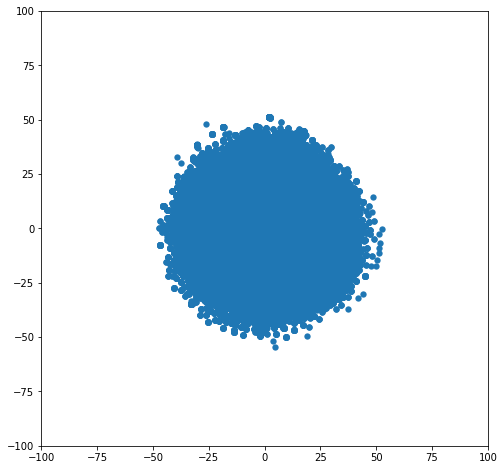

In [34]:
# We create a scatter plot with perplexity = 50
docs_proj_50 = TSNE(random_state=RS, perplexity=50).fit_transform(vectors)
scatter(docs_proj_50)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x159aa7438>)

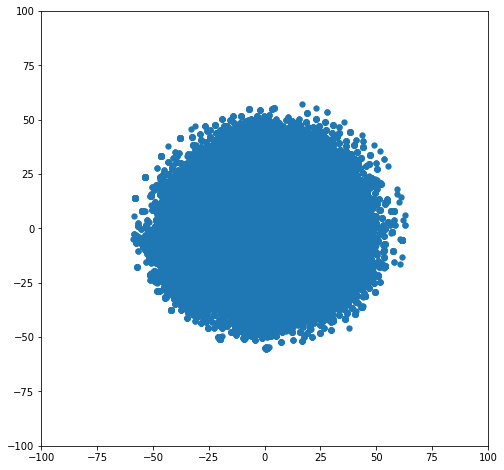

In [35]:
# We create a scatter plot with perplexity = 30
docs_proj_30 = TSNE(random_state=RS, perplexity=30).fit_transform(vectors)
scatter(docs_proj_30)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x159b83fd0>)

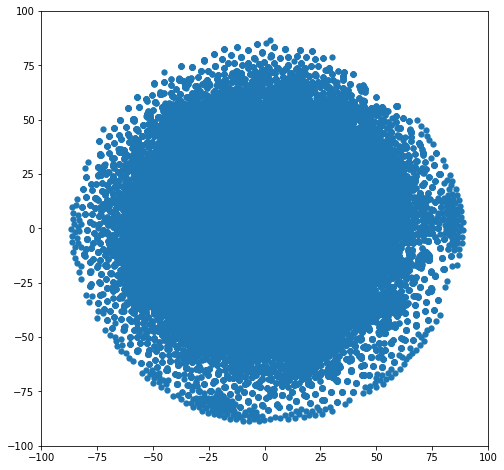

In [36]:
# We create a scatter plot with perplexity = 5
docs_proj_5 = TSNE(random_state=RS, perplexity=5).fit_transform(vectors)
scatter(docs_proj_5)

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x15a50df98>)

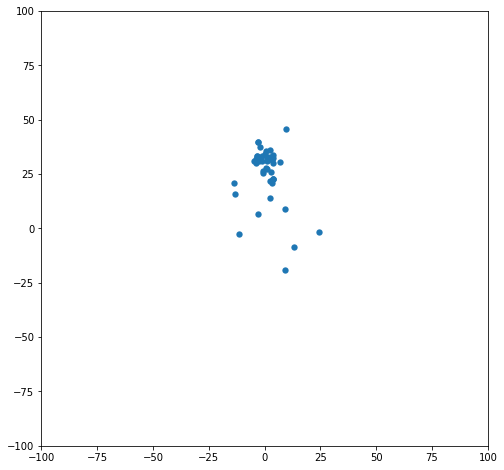

In [43]:
"""some jobs don't work very well"""
software_indices = []
for i in range(len(vectors)-1):
    if 'Software Engineer' == titles[i]:
        software_indices.append(i)
        
scatter(docs_proj_30[software_indices])

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x159f8efd0>)

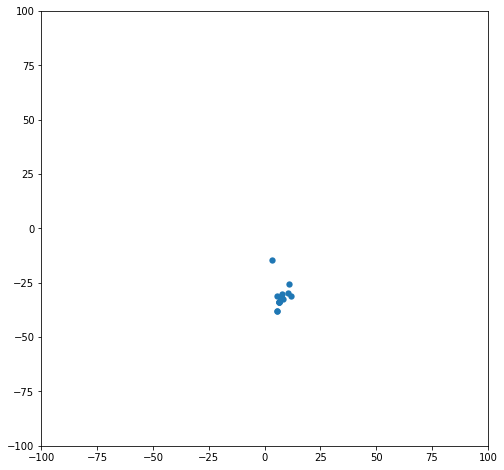

In [38]:
assistant_indices = []
for i in range(len(vectors)-1):
    if 'Assistant Front Office Manager' in titles[i]:
        assistant_indices.append(i)
        
scatter(docs_proj_30[assistant_indices])

[[-46.461018  33.23069 ]
 [-46.488705  33.267002]
 [-46.490177  33.26891 ]
 [-46.460308  33.229713]
 [-46.490288  33.269062]
 [-46.490273  33.26905 ]
 [-46.455772  33.224575]
 [-46.489044  33.267418]
 [-46.488934  33.2673  ]
 [-46.488945  33.26732 ]
 [-46.488728  33.267006]
 [-46.490288  33.269054]
 [-46.48899   33.267376]
 [-46.488895  33.267265]
 [-46.49127   33.2701  ]
 [-46.490513  33.269333]
 [-46.459858  33.22944 ]
 [-46.460464  33.230038]
 [-46.490356  33.269146]
 [-46.488724  33.26705 ]
 [-46.45989   33.22911 ]
 [-46.49028   33.268974]
 [-46.49046   33.269264]
 [-46.488316  33.26646 ]
 [-46.48896   33.267307]]


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x159feeef0>)

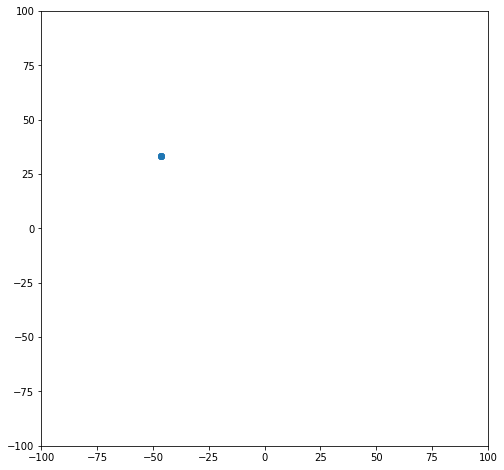

In [39]:
"""but some jobs work very well"""
package_indices = []
for i in range(len(vectors)-1):
    if 'Package Handler - Part-Time' in titles[i]:
        package_indices.append(i)
        
        
print(docs_proj_30[package_indices])

scatter(docs_proj_30[package_indices])

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x15a221940>)

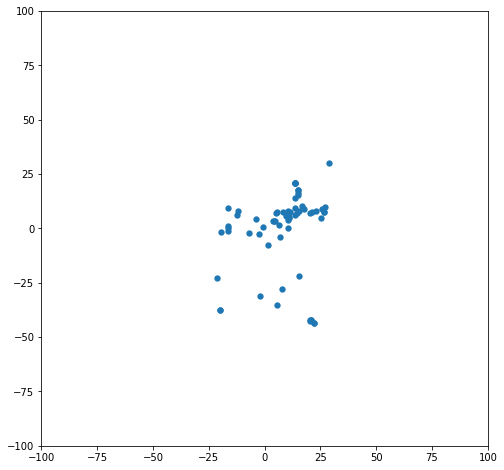

In [40]:
call_indices = []
for i in range(len(vectors)-1):
    if 'Call Center Representative' == titles[i]:
        call_indices.append(i)
        
scatter(docs_proj_30[call_indices])